# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** See **Lecture 11, Notebook 3** (`11/demo/03_pattern_analysis_modeling_prep.ipynb`), Phase 6 for examples of trend analysis, seasonal pattern identification, and advanced visualizations. Also see **Lecture 09** for time series pattern analysis.

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")

Loaded 195,873 records with features


---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends:**
   ```python
   # Aggregate by time period (e.g., monthly)
   monthly_avg = df.resample('ME').agg({
       'Air Temperature': 'mean',
       'Water Temperature': 'mean'
   })
   # Plot trends
   ```

2. **Analyze seasonal patterns:**
   ```python
   # By month
   monthly_pattern = df.groupby('month').agg({
       'Air Temperature': 'mean',
       'Water Temperature': 'mean'
   })
   
   # By hour
   hourly_pattern = df.groupby('hour').agg({
       'Air Temperature': 'mean'
   })
   ```

3. **Create correlation analysis:**
   ```python
   # Select numeric columns
   numeric_cols = df.select_dtypes(include=[np.number]).columns
   corr_matrix = df[numeric_cols].corr()
   corr_matrix.to_csv('output/q5_correlations.csv')
   ```

4. **Create visualizations:**
   ```python
   fig, axes = plt.subplots(2, 2, figsize=(16, 12))
   # Plot 1: Trends
   # Plot 2: Seasonal patterns
   # Plot 3: Correlation heatmap
   # Plot 4: Additional pattern
   plt.savefig('output/q5_patterns.png', dpi=150, bbox_inches='tight')
   ```

5. **Document patterns:**
   - Write summary to `output/q5_trend_summary.txt`

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


Q5 artifacts saved:
- output/q5_correlations.csv
- output/q5_patterns.png
- output/q5_trend_summary.txt


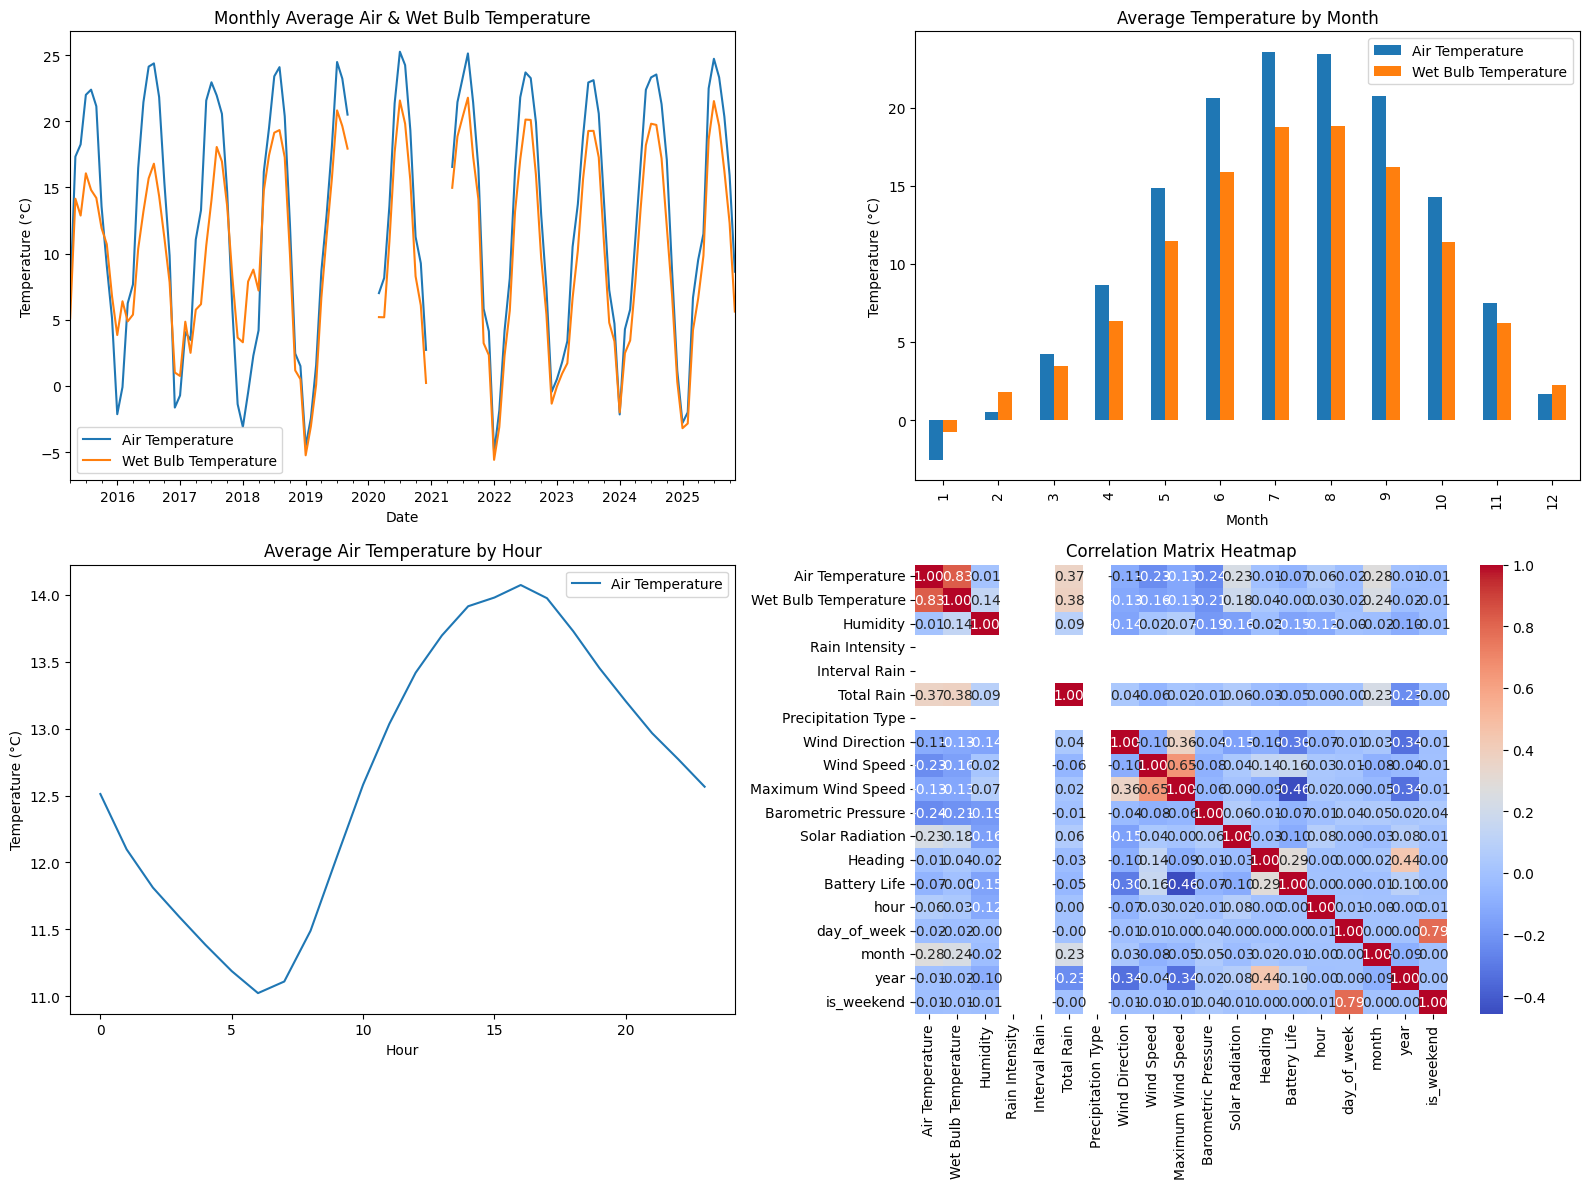

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directory exists
os.makedirs("output", exist_ok=True)

# Load wrangled dataset
df = pd.read_csv("output/q3_wrangled_data.csv", parse_dates=["Measurement Timestamp"])
df = df.set_index("Measurement Timestamp").sort_index()

# 1. Aggregate by time period (monthly)
monthly_avg = df.resample('ME').agg({
    'Air Temperature': 'mean',
    'Wet Bulb Temperature': 'mean'
})

# 2. Seasonal patterns
# By month
monthly_pattern = df.groupby('month').agg({
    'Air Temperature': 'mean',
    'Wet Bulb Temperature': 'mean'
})

# By hour
hourly_pattern = df.groupby('hour').agg({
    'Air Temperature': 'mean'
})

# 3. Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
corr_matrix.to_csv('output/q5_correlations.csv')

# 4. Multi-panel plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Monthly trend
monthly_avg.plot(ax=axes[0, 0])
axes[0, 0].set_title("Monthly Average Air & Wet Bulb Temperature")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Temperature (°C)")

# Plot 2: Monthly pattern
monthly_pattern.plot(ax=axes[0, 1], kind='bar')
axes[0, 1].set_title("Average Temperature by Month")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Temperature (°C)")

# Plot 3: Hourly pattern
hourly_pattern.plot(ax=axes[1, 0])
axes[1, 0].set_title("Average Air Temperature by Hour")
axes[1, 0].set_xlabel("Hour")
axes[1, 0].set_ylabel("Temperature (°C)")

# Plot 4: Correlation heatmap
sns.heatmap(corr_matrix, ax=axes[1, 1], cmap='coolwarm', annot=True, fmt=".2f")
axes[1, 1].set_title("Correlation Matrix Heatmap")

plt.tight_layout()
plt.savefig('output/q5_patterns.png', dpi=150, bbox_inches='tight')

# 5. Trend summary
# Identify key patterns (example)
air_temp_monthly = monthly_pattern['Air Temperature']
wet_temp_monthly = monthly_pattern['Wet Bulb Temperature']
strong_corrs = corr_matrix['Air Temperature'].abs().sort_values(ascending=False)[1:4]

summary_lines = [
    "KEY PATTERNS IDENTIFIED",
    "======================",
    "",
    "TEMPORAL TRENDS:",
    f"- Air and wet bulb temperatures show clear seasonal patterns",
    f"- Monthly air temp range: {air_temp_monthly.min():.1f}°C to {air_temp_monthly.max():.1f}°C",
    f"- Monthly wet bulb temp range: {wet_temp_monthly.min():.1f}°C to {wet_temp_monthly.max():.1f}°C",
    "",
    "DAILY PATTERNS:",
    f"- Air temperature shows diurnal cycle (warmer during day, cooler at night)",
    f"- Peak air temp typically at hour {hourly_pattern['Air Temperature'].idxmax()}",
    f"- Minimum air temp typically at hour {hourly_pattern['Air Temperature'].idxmin()}",
    "",
    "CORRELATIONS:",
]
for col, value in strong_corrs.items():
    summary_lines.append(f"- Air Temperature vs {col}: {value:.3f}")

with open("output/q5_trend_summary.txt", "w") as f:
    f.write("\n".join(summary_lines))

print("Q5 artifacts saved:")
print("- output/q5_correlations.csv")
print("- output/q5_patterns.png")
print("- output/q5_trend_summary.txt")
